In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('car data.csv')
print("Initial Data:")
print(df.head())

Initial Data:
  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  


In [4]:
label_enc = LabelEncoder()
df['Seller_Type'] = label_enc.fit_transform(df['Seller_Type'])
df['Transmission'] = label_enc.fit_transform(df['Transmission'])
df['Fuel_Type'] = label_enc.fit_transform(df['Fuel_Type'])

In [5]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    int64  
 6   Seller_Type    301 non-null    int64  
 7   Transmission   301 non-null    int64  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 21.3+ KB


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
X = df.drop(['Car_Name', 'Selling_Price'], axis=1)
y = df['Selling_Price']

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = model.predict(X_test)

In [11]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"\nModel Performance:\nR² Score: {r2:.3f}\nRMSE: {rmse:.3f}")


Model Performance:
R² Score: 0.847
RMSE: 1.879


In [12]:
print("Predicted values:", y_pred)
print("Actual values:", y_test.values)

Predicted values: [ 2.96670467  8.3025584   6.05620758 -1.46814968  9.25713882  7.032306
  1.35164871  0.8268692   1.37173108  7.10742891  8.74382695  0.58613312
  8.50347194  3.42803571  6.50183791  3.08701389  0.46323861 10.8959559
  1.76487652  2.36736645  0.37538646  7.73247978  6.2075281   2.64722707
  0.78232086  3.72073841  5.33393873  2.83824054  2.16090172  1.77220708
  0.37859447  8.79078642 -0.7007019   2.2988819   8.21516023  4.54037167
  7.35322104  7.68237569  2.91768184  8.08080852  3.99669454  4.34672417
  4.36388106  0.61018923  6.94478948  0.47281585  7.41596672 11.44059317
  3.14822313  4.95097368  6.86250813  2.19862524 20.53946595 16.79146986
  7.13952545  9.830903    4.49886186  8.62078376  1.810855    7.67299866
  0.21098592]
Actual values: [ 0.35 10.11  4.95  0.15  6.95  7.45  1.1   0.5   0.45  6.    9.25  1.1
  7.5   0.4   6.15  2.65  0.95 17.    0.48  1.7   0.42  8.35  5.35  3.
  0.6   3.75  5.    2.65  1.2   1.2   0.65  8.25  0.45  1.95  7.75  3.65
  5.5   3.

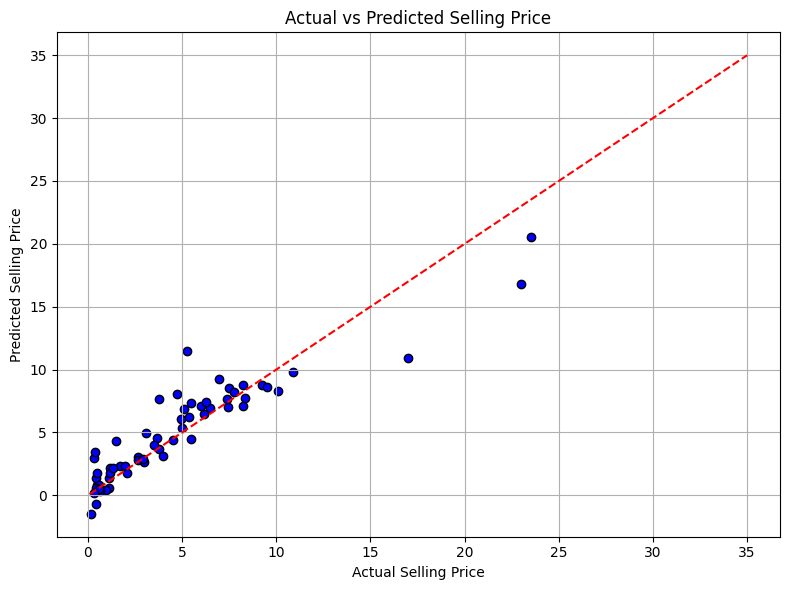

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs Predicted Selling Price')
plt.grid(True)
plt.tight_layout()
plt.show()